In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv('insurance.csv')

In [135]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [136]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [137]:
df.tail(3)

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87
1339,1340,30.00,female,47.40,101,No,0,Yes,southeast,63770.43


In [138]:
df.shape

(1340, 10)

In [139]:
pd.set_option("display.float_format", '{:.2f}'.format)

In [140]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [141]:
df.duplicated().sum()

np.int64(0)

In [142]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [143]:
df.dropna(inplace=True)


In [144]:
df.shape

(1332, 10)

In [145]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


In [146]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


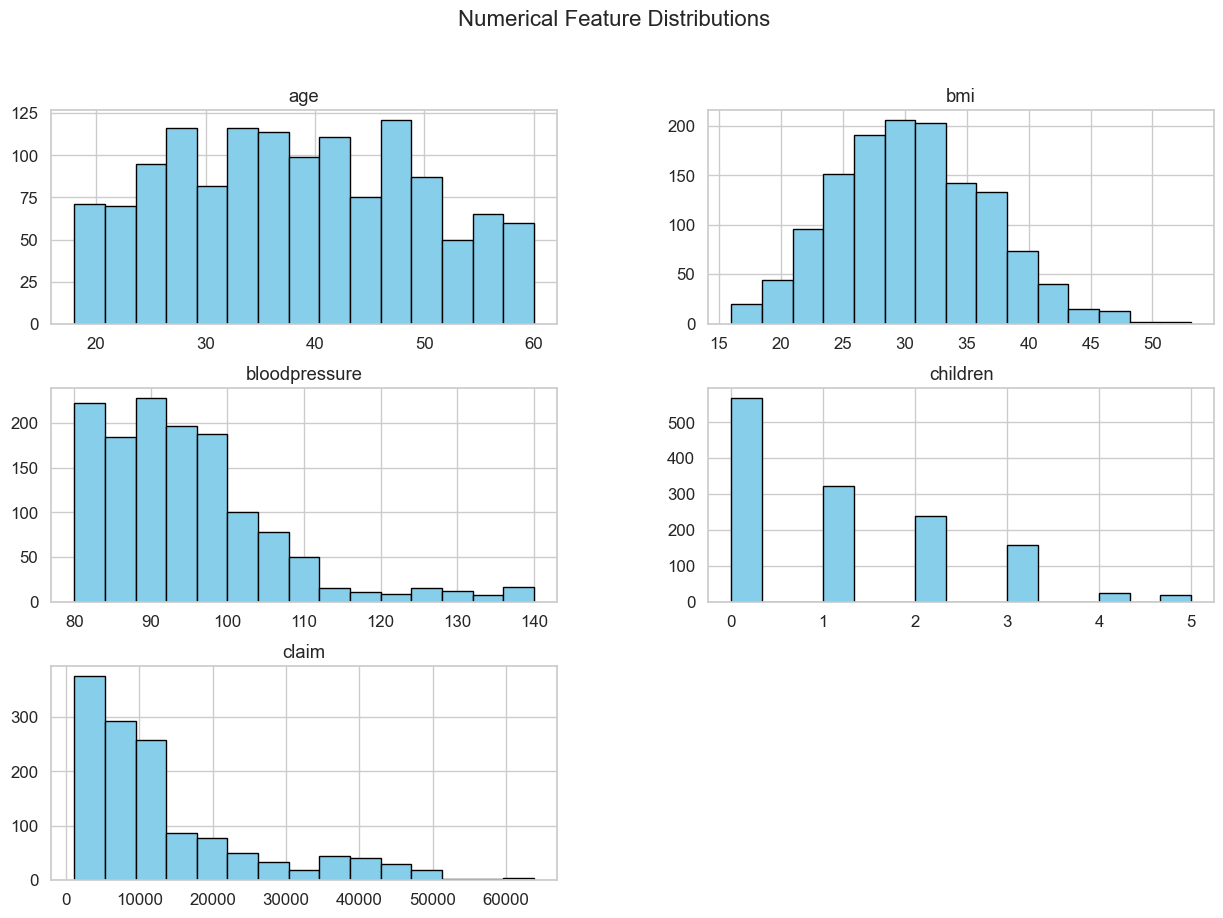

In [147]:
numerical_cols = ["age", "bmi", "bloodpressure","children", "claim"]
df[numerical_cols].hist(bins=15, figsize=(15, 10), color="skyblue",edgecolor="black")
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

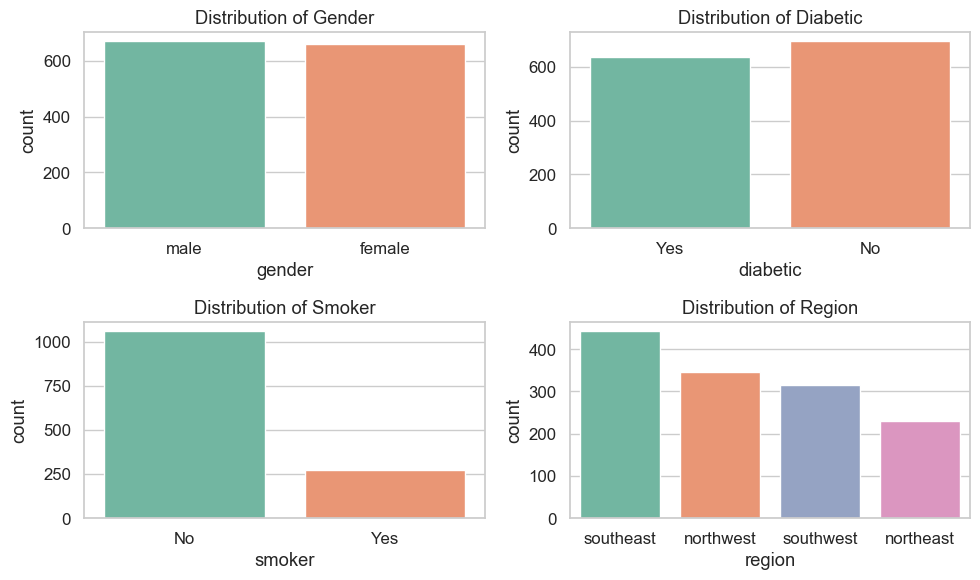

In [148]:
cat_cols = ["gender", "diabetic", "smoker", "region"]
plt.figure(figsize=(10,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col.capitalize()}')
    plt.tight_layout()

In [149]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

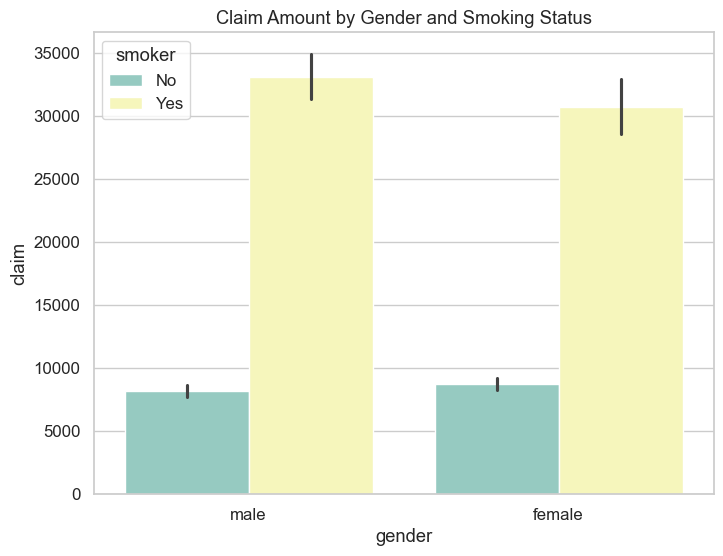

In [150]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", palette="Set3")
plt.title("Claim Amount by Gender and Smoking Status")
plt.show()

In [151]:
pivot_region_diabetic=df.groupby(["region","diabetic"])["claim"].mean().unstack()


In [152]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


Text(0.5, 0, 'Region')

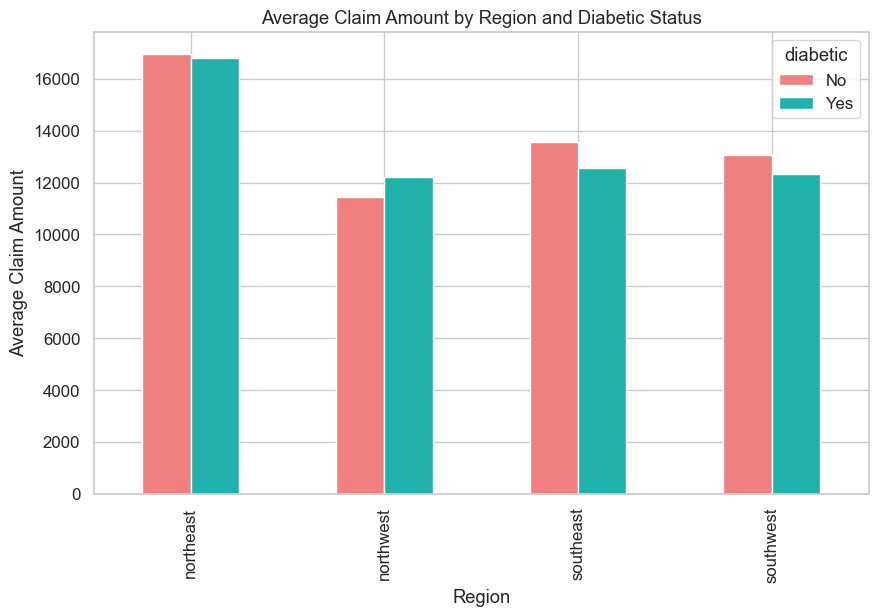

In [153]:
pivot_region_diabetic.plot(kind="bar", figsize=(10,6), color=["lightcoral", "lightseagreen"])
plt.title("Average Claim Amount by Region and Diabetic Status")
plt.ylabel("Average Claim Amount")
plt.xlabel("Region")

In [154]:
pivot_table = df.pivot_table(values="claim", index="region", columns="smoker", aggfunc="mean").round(2)
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [155]:
pivot_table=pd.pivot_table(df, values="claim", index="children", columns="diabetic", aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


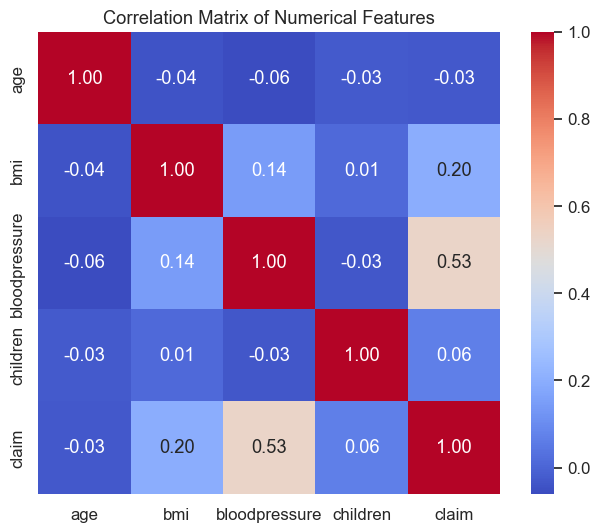

In [156]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True )
plt.title("Correlation Matrix of Numerical Features")
plt.show()  

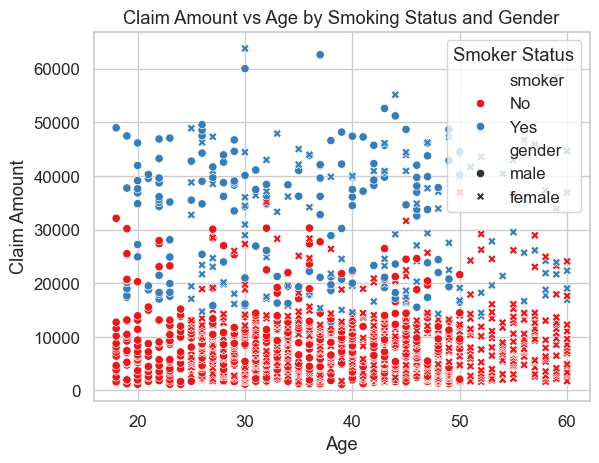

In [157]:
sns.scatterplot(data=df, x="age", y="claim", hue="smoker", style="gender", palette="Set1")
plt.title("Claim Amount vs Age by Smoking Status and Gender")
plt.xlabel("Age")
plt.ylabel("Claim Amount")
plt.legend(title="Smoker Status")
plt.show()  

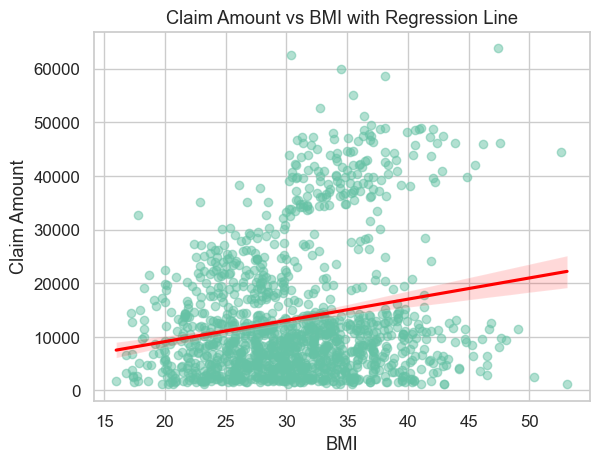

In [158]:
sns.regplot(data=df, x="bmi", y="claim", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Claim Amount vs BMI with Regression Line")   
plt.xlabel("BMI")
plt.ylabel("Claim Amount")
plt.show()

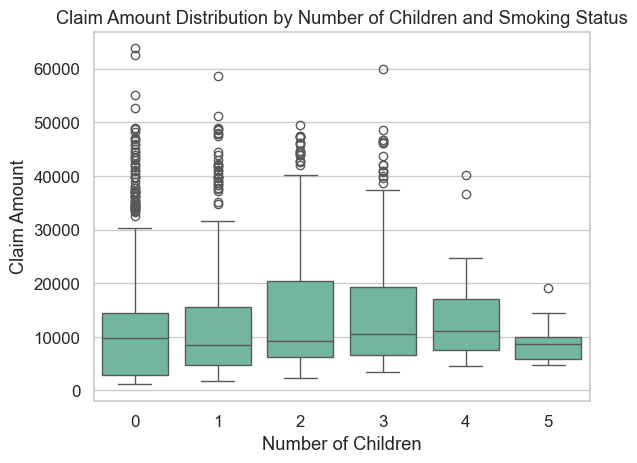

In [159]:
sns.boxplot(data=df, x="children", y="claim")
plt.title("Claim Amount Distribution by Number of Children and Smoking Status")
plt.xlabel("Number of Children")
plt.ylabel("Claim Amount")
plt.show()

In [160]:
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,45,60,100], labels=["<18", "18-30", "31-45", "46-60", "60+"])

In [161]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


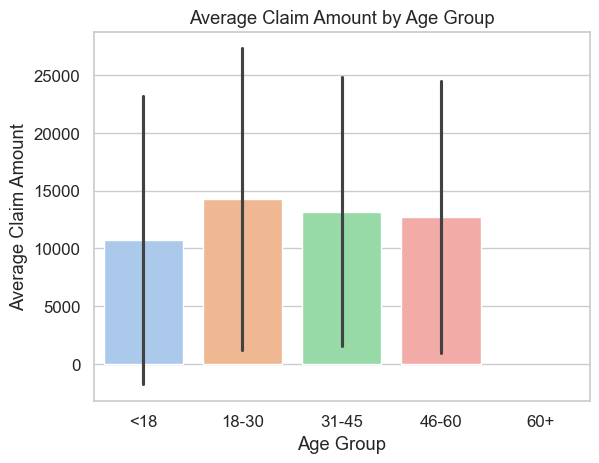

In [162]:
sns.barplot(data=df, x="age_group", y="claim", estimator="mean", errorbar="sd", palette="pastel")
plt.title("Average Claim Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Claim Amount")
plt.show()


In [163]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0,18.5,24.9,29.9,100], labels=["Underweight", "Normal", "Overweight", "Obese"])

In [164]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

In [165]:
import warnings
warnings.filterwarnings("ignore")

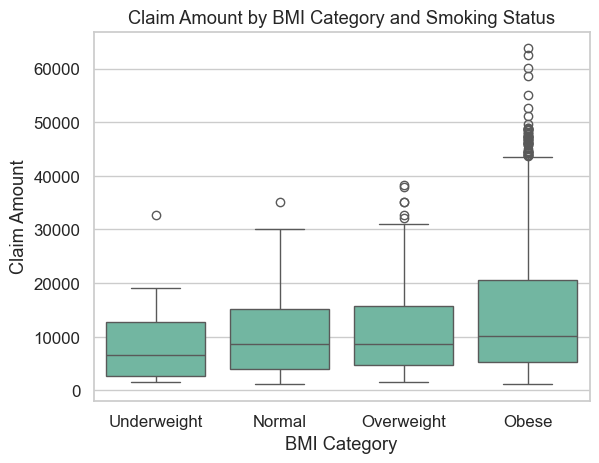

In [166]:
sns.boxplot(data=df, x="bmi_category", y="claim")
plt.title("Claim Amount by BMI Category and Smoking Status")
plt.xlabel("BMI Category")
plt.ylabel("Claim Amount")
plt.show()

In [167]:
region_stats=df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean()*100),
    mean_claim = ("claim", "mean")
).reset_index()

In [168]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


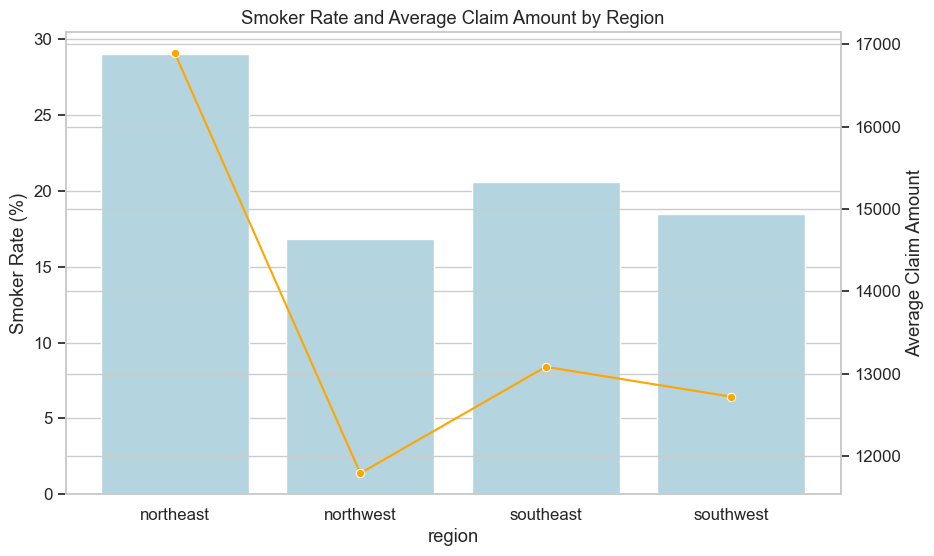

In [169]:
fig, ax1 = plt.subplots(figsize=(10,6)) 
sns.barplot(data=region_stats, x="region", y="smoker_rate", ax=ax1, color="lightblue")
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, color="orange", marker="o")
ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim Amount")
plt.title("Smoker Rate and Average Claim Amount by Region")
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import joblib

In [171]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [172]:
X=df[["age", "gender","bmi", "bloodpressure", "diabetic" ,"children", "smoker"]]
y=df["claim"]   


In [173]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [174]:
cat_cols=["gender", "diabetic", "smoker"]
label_encoders={}

In [175]:
for col in cat_cols:
    le=LabelEncoder()   
     
    X[col]=le.fit_transform(X[col])
    label_encoders[col]=le

    joblib.dump(le, f"label_encoder_{col}.pkl")

In [176]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [177]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
from sklearn.discriminant_analysis import StandardScaler


num_cols=["age", "bmi", "bloodpressure", "children"]
scaler=StandardScaler()

In [180]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [181]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [182]:
print(X_train.shape , y_train.shape)

(1065, 7) (1065,)


In [183]:
print(X_test.shape , y_test.shape)

(267, 7) (267,)


In [197]:
# Feature engineering
# -------------------------
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,45,60,100], labels=["<18", "18-30", "31-45", "46-60", "60+"])
df["bmi_category"] = pd.cut(df["bmi"], bins=[0,18.5,24.9,29.9,100], labels=["Underweight", "Normal", "Overweight", "Obese"])

# -------------------------
# Encoding categorical columns
# -------------------------
X = df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker"]]
y = df["claim"]

cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    joblib.dump(le, f"label_encoder_{col}.pkl")


In [198]:
# -------------------------
# Train-test split and scaling
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
joblib.dump(scaler, "scaler.pkl")

print("Training shape:", X_train.shape, "Testing shape:", X_test.shape)


Training shape: (1065, 7) Testing shape: (267, 7)


In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [199]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

results = {}

In [200]:
# -------------------------
# 1️⃣ Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_test, y_test)

# -------------------------
# 2️⃣ Polynomial Regression
# -------------------------
best_poly_model = None
best_poly_score = -np.inf

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)
    score = poly_lr.score(X_test_poly, y_test)
    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model
results[f"Polynomial Regression (deg={degree})"] = evaluate_model(poly_lr, poly.transform(X_test), y_test)

# -------------------------
# 3️⃣ Random Forest Regressor (with Grid Search)
# -------------------------
rf = RandomForestRegressor(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring="r2", verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results["Random Forest"] = evaluate_model(best_rf, X_test, y_test)

# -------------------------
# 4️⃣ Support Vector Regressor (SVR)
# -------------------------
svr = SVR()
svr_params = {
    "kernel": ["linear", "rbf"],
    "C": [1, 10],
    "gamma": ["scale", "auto"]
}
svr_grid = GridSearchCV(svr, svr_params, cv=3, n_jobs=-1, scoring="r2", verbose=0)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
results["SVR"] = evaluate_model(best_svr, X_test, y_test)

# -------------------------
# 5️⃣ XGBoost Regressor
# -------------------------
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb.fit(X_train, y_train)
results["XGBoost"] = evaluate_model(xgb, X_test, y_test)


In [202]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\n=== Model Comparison ===")
print(results_df)


=== Model Comparison ===
                                       MSE     RMSE     MAE   R2
Random Forest                  25974044.11  5096.47 3931.00 0.82
XGBoost                        29922377.90  5470.14 4174.64 0.79
Polynomial Regression (deg=2)  32317264.32  5684.83 4426.32 0.78
Linear Regression              40553181.36  6368.14 5034.26 0.72
SVR                           118602761.86 10890.49 7226.20 0.18


In [203]:
best_model_name = results_df["R2"].idxmax()
best_model = {"Linear Regression": lr,
              f"Polynomial Regression (deg={degree})": poly_lr,
              "Random Forest": best_rf,
              "SVR": best_svr,
              "XGBoost": xgb}[best_model_name]

In [204]:

joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ Best Model Saved: {best_model_name}")


✅ Best Model Saved: Random Forest
